In [344]:
import pandas as pd
import numpy as np
diabetes =  pd.read_csv("Diabetes.csv", delimiter=",")
diabetes.replace('no data', np.nan, inplace=True)
diabetes.rename(columns={'Numeric':'Diabetes Rate'}, inplace=True)
print(diabetes.columns)
diabetes.dropna(subset=['Country Name'], inplace=True)
diabetes.drop(['Comment', 'Area', 'Cancer Type', 'Unnamed: 11'], axis=1, inplace=True)
print("No data count:\n", diabetes.isna().sum())
print("Avaialble data count:\n", diabetes.notna().sum())

diabetes_total = diabetes[(diabetes['Gender'] == 'Total') & (diabetes["Year"] == 2019) & (diabetes['Indicator Name'] == 'Percentage of diabetes deaths occurring under 70 years')]

print(diabetes_total)

Index(['Indicator Name', 'Cancer Type', 'Year', 'Country Name', 'Region',
       'Gender', 'Area', 'Diabetes Rate', 'Lower Confidence Limit',
       'Upper Confidence Limit', 'Comment', 'Unnamed: 11'],
      dtype='object')
No data count:
 Indicator Name               0
Year                         0
Country Name                 0
Region                       0
Gender                       0
Diabetes Rate               78
Lower Confidence Limit    1212
Upper Confidence Limit    1212
dtype: int64
Avaialble data count:
 Indicator Name            1803
Year                      1803
Country Name              1803
Region                    1803
Gender                    1803
Diabetes Rate             1725
Lower Confidence Limit     591
Upper Confidence Limit     591
dtype: int64
                                         Indicator Name  Year  \
606   Percentage of diabetes deaths occurring under ...  2019   
609   Percentage of diabetes deaths occurring under ...  2019   
612   Percentage of 

In [345]:
physicalinactivity = pd.read_csv("Physical inactivity.csv", delimiter=",")
physicalinactivity.dropna(subset=['Country Name'], inplace=True)
physicalinactivity.drop(['Comment','Cancer Type'], axis=1, inplace=True)
physicalinactivity.rename(columns={'Numeric':'Inactivity Rate'}, inplace=True)
physicalinactivity_total = physicalinactivity[(physicalinactivity['Year'] == 2022) & (physicalinactivity['Gender'] == 'Total') & (physicalinactivity['Indicator Name'] == 'Physical inactivity, adults aged 18+')]

In [346]:
spending = pd.read_csv("GHED_data.csv", delimiter=",")
spending = spending[spending['year'] == 2021]
spending = spending[['country','che_gdp']]
spending.dropna(subset=['country'], inplace=True)
spending.rename(columns={'country':'Country Name'}, inplace=True)




/home/viktor/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3306: DtypeWarning: Columns (6,22,23,24,36,38,102,103,104,105,109,110,111,117,119,125,126,127,128,132,133,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,240,241,242,243,244,245,247,248,249,250,251,253,254,255,256,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,

In [347]:
print(diabetes_total.shape, physicalinactivity_total.shape, spending.shape)

combined_df = pd.merge(diabetes_total, spending, on='Country Name', how='right')

final_df = pd.merge(combined_df, physicalinactivity_total, on='Country Name', how='left')

print(final_df.head())


(200, 8) (202, 10) (192, 2)
                                    Indicator Name_x  Year_x  Country Name  \
0  Percentage of diabetes deaths occurring under ...    2019       Algeria   
1  Percentage of diabetes deaths occurring under ...    2019        Angola   
2  Percentage of diabetes deaths occurring under ...    2019         Benin   
3  Percentage of diabetes deaths occurring under ...    2019      Botswana   
4  Percentage of diabetes deaths occurring under ...    2019  Burkina Faso   

         Region_x Gender_x Diabetes Rate Lower Confidence Limit_x  \
0  African Region    Total   35.91257782                      NaN   
1  African Region    Total   64.05222699                      NaN   
2  African Region    Total   57.29958436                      NaN   
3  African Region    Total   58.08801158                      NaN   
4  African Region    Total   66.64058545                      NaN   

  Upper Confidence Limit_x  che_gdp                      Indicator Name_y  \
0          

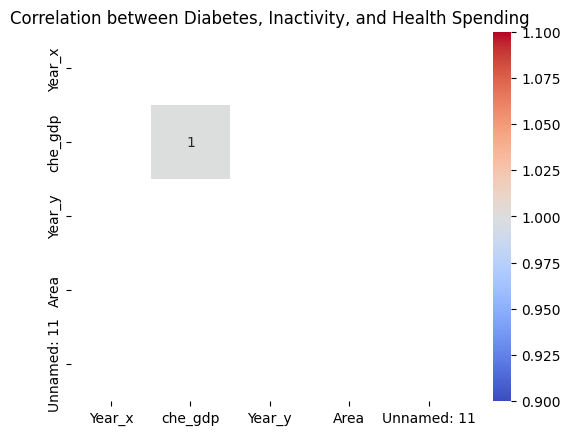

In [348]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = final_df.corr()

# Plot correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Diabetes, Inactivity, and Health Spending")
plt.show()

Empty DataFrame
Columns: [Indicator Name_x, Year_x, Country Name, Region_x, Gender_x, Diabetes Rate, Lower Confidence Limit_x, Upper Confidence Limit_x, che_gdp, Indicator Name_y, Year_y, Region_y, Gender_y, Area, Inactivity Rate, Lower Confidence Limit_y, Upper Confidence Limit_y, Unnamed: 11]
Index: []


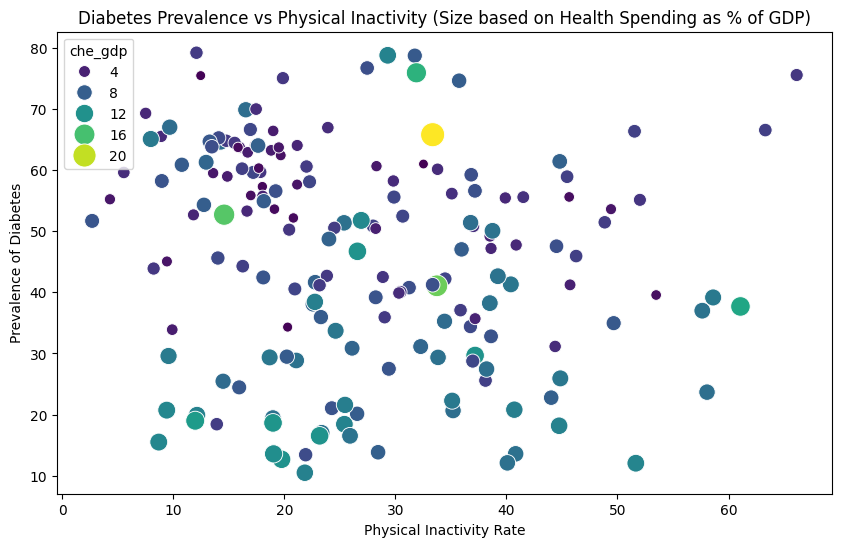

In [349]:
final_df['Inactivity Rate'] = pd.to_numeric(final_df['Inactivity Rate'], errors='coerce')
final_df['Diabetes Rate'] = pd.to_numeric(final_df['Diabetes Rate'], errors='coerce')
print(final_df[final_df['Diabetes Rate'] > 240])
plt.figure(figsize=(10,6))
sns.scatterplot(data=final_df, x='Inactivity Rate', y='Diabetes Rate', hue='che_gdp', size='che_gdp', sizes=(50, 300), palette='viridis')
plt.title("Diabetes Prevalence vs Physical Inactivity (Size based on Health Spending as % of GDP)")
plt.xlabel("Physical Inactivity Rate")
plt.ylabel("Prevalence of Diabetes")
plt.show()


Empty DataFrame
Columns: [Indicator Name_x, Year_x, Country Name, Region_x, Gender_x, Diabetes Rate, Lower Confidence Limit_x, Upper Confidence Limit_x, che_gdp, Indicator Name_y, Year_y, Region_y, Gender_y, Area, Inactivity Rate, Lower Confidence Limit_y, Upper Confidence Limit_y, Unnamed: 11]
Index: []


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


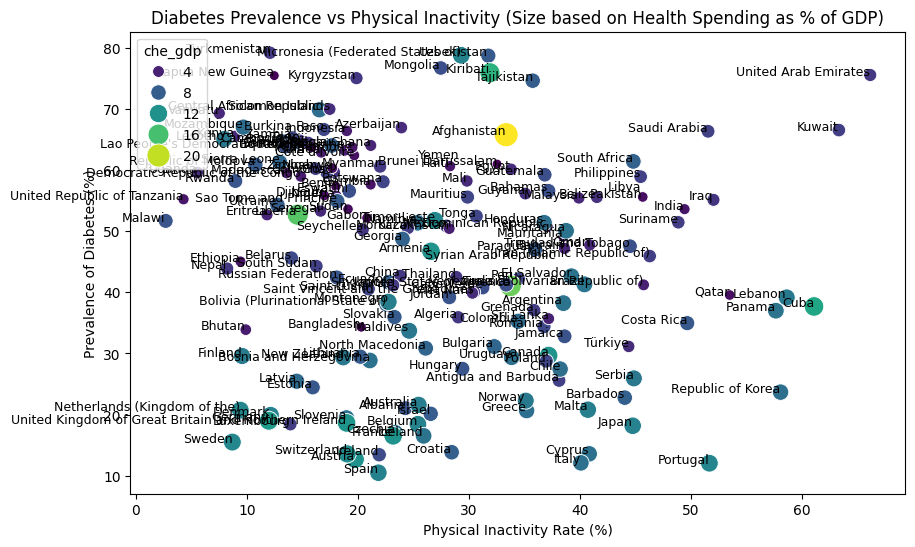

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the columns are numeric
final_df['Inactivity Rate'] = pd.to_numeric(final_df['Inactivity Rate'], errors='coerce')
final_df['Diabetes Rate'] = pd.to_numeric(final_df['Diabetes Rate'], errors='coerce')

# Print countries with Diabetes Rate > 240 for debugging or exploration
print(final_df[final_df['Diabetes Rate'] > 240])

# Scatter plot with labels
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=final_df, 
    x='Inactivity Rate', 
    y='Diabetes Rate', 
    hue='che_gdp', 
    size='che_gdp', 
    sizes=(50, 300), 
    palette='viridis'
)

# Adding country labels to each point
for i in range(final_df.shape[0]):
    plt.text(
        final_df['Inactivity Rate'].iloc[i], 
        final_df['Diabetes Rate'].iloc[i], 
        final_df['Country Name'].iloc[i], 
        fontsize=9, 
        ha='right'  # horizontal alignment
    )

plt.title("Diabetes Prevalence vs Physical Inactivity (Size based on Health Spending as % of GDP)")
plt.xlabel("Physical Inactivity Rate (%)")
plt.ylabel("Prevalence of Diabetes (%)")
plt.show()


/tmp/ipykernel_115478/2997934216.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Cluster'] = kmeans.fit_predict(X)


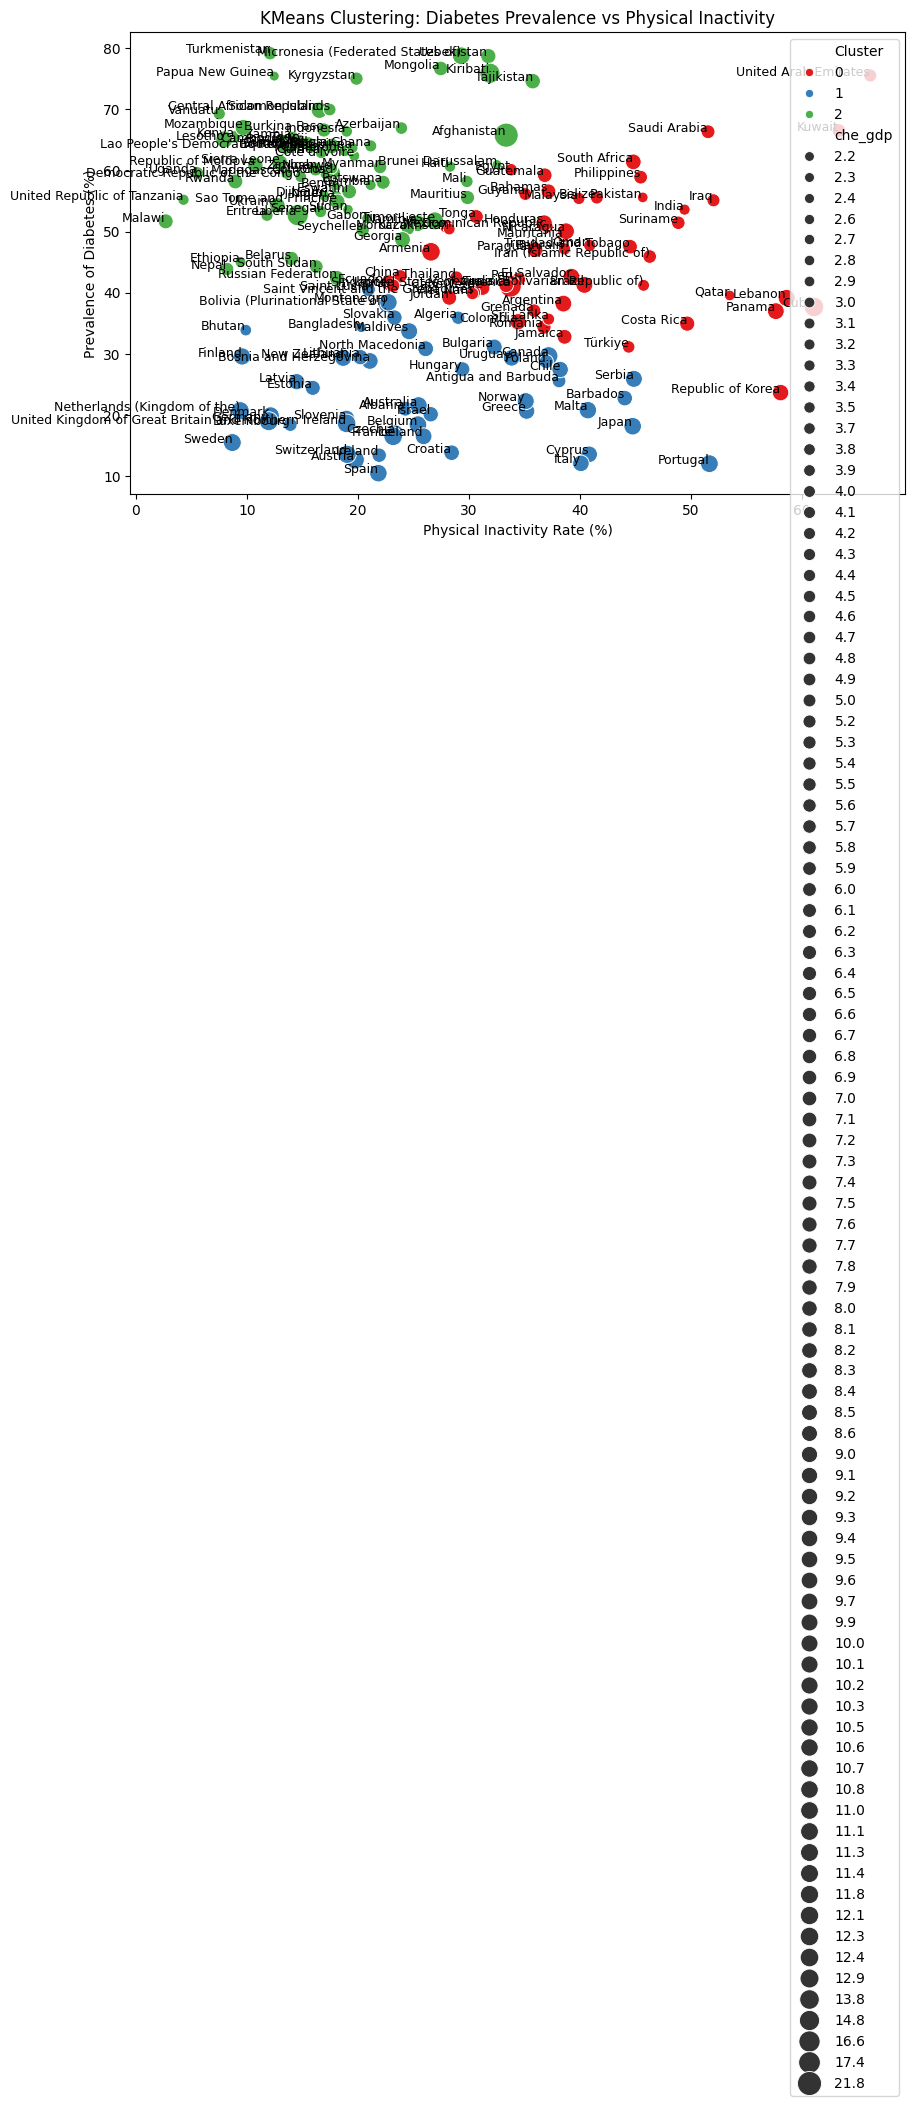

In [351]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the relevant columns are numeric
final_df['Inactivity Rate'] = pd.to_numeric(final_df['Inactivity Rate'], errors='coerce')
final_df['Diabetes Rate'] = pd.to_numeric(final_df['Diabetes Rate'], errors='coerce')

# Drop rows with missing values in 'Inactivity Rate', 'Diabetes Rate', and 'che_gdp'
cleaned_df = final_df.dropna(subset=['Inactivity Rate', 'Diabetes Rate', 'che_gdp'])

# Select relevant columns for clustering
X = cleaned_df[['Inactivity Rate', 'Diabetes Rate', 'che_gdp']]

# Apply KMeans clustering (let's start with 3 clusters, you can adjust k later)
kmeans = KMeans(n_clusters=3, random_state=42)
cleaned_df['Cluster'] = kmeans.fit_predict(X)

# Scatter plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cleaned_df, 
    x='Inactivity Rate', 
    y='Diabetes Rate', 
    hue='Cluster', 
    palette='Set1', 
    size='che_gdp', 
    sizes=(50, 300), 
    legend='full'
)

# Add country names to each dot
for i in range(cleaned_df.shape[0]):
    plt.text(
        cleaned_df['Inactivity Rate'].iloc[i], 
        cleaned_df['Diabetes Rate'].iloc[i], 
        cleaned_df['Country Name'].iloc[i], 
        fontsize=9, 
        ha='right'
    )

plt.title("KMeans Clustering: Diabetes Prevalence vs Physical Inactivity")
plt.xlabel("Physical Inactivity Rate (%)")
plt.ylabel("Prevalence of Diabetes (%)")
plt.show()


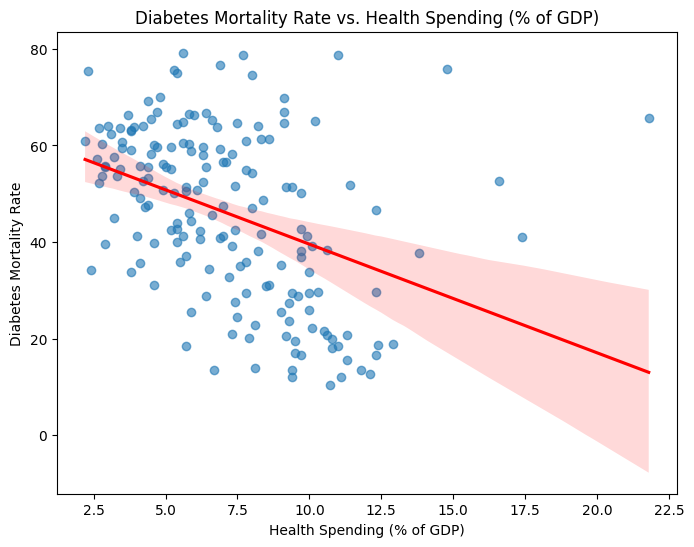

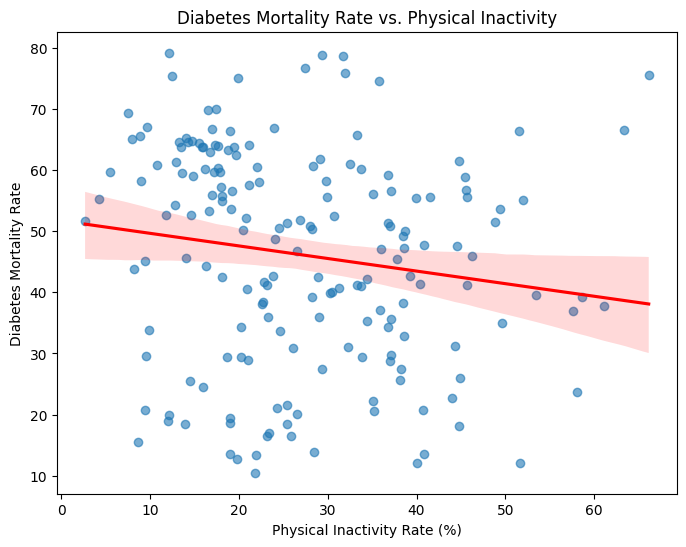

In [352]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Diabetes Rate vs. Health Spending
plt.figure(figsize=(8, 6))
sns.regplot(data=final_df, x='che_gdp', y='Diabetes Rate', scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.title('Diabetes Mortality Rate vs. Health Spending (% of GDP)')
plt.xlabel('Health Spending (% of GDP)')
plt.ylabel('Diabetes Mortality Rate')
plt.show()

# Scatter plot: Diabetes Rate vs. Physical Inactivity
plt.figure(figsize=(8, 6))
sns.regplot(data=final_df, x='Inactivity Rate', y='Diabetes Rate', scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.title('Diabetes Mortality Rate vs. Physical Inactivity')
plt.xlabel('Physical Inactivity Rate (%)')
plt.ylabel('Diabetes Mortality Rate')
plt.show()


/home/viktor/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


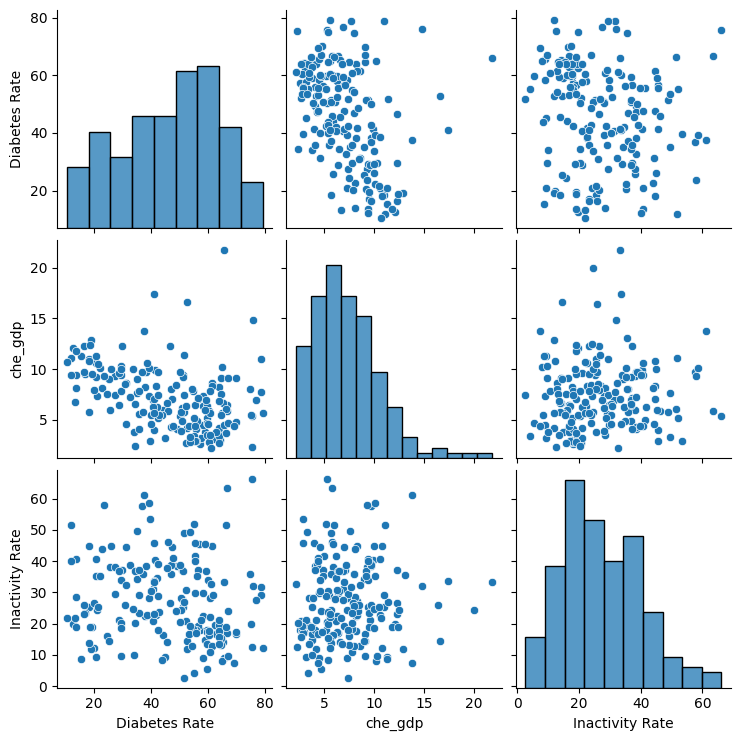

In [353]:
# Pair plot to visualize relationships
sns.pairplot(final_df[['Diabetes Rate', 'che_gdp', 'Inactivity Rate']])
plt.show()


In [354]:
correlation_matrix = final_df[['Diabetes Rate', 'che_gdp', 'Inactivity Rate']].corr()
print(correlation_matrix)

ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values